In [1]:
%load_ext lab_black

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
np.random.seed(1234)

In [4]:
# Generate true labels
y_true = np.concatenate((np.ones(20), np.zeros(20))).astype(int)
n_sample = len(y_true)

print(n_sample)
y_true

40


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [5]:
# Generate preditions. Mark the 1st 10 samples as positive to ensure the accuracy
# is above 50%.
y_pred = np.concatenate((np.ones(15), np.zeros(20), np.ones(n_sample - 35))).astype(int)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [6]:
acc = np.mean(y_true == y_pred)
acc

0.75

In [7]:
# The samples labelled as 0 are belong to Class 1.
idx_pred_c1 = np.where(y_pred == 0)[0]
idx_pred_c2 = np.where(y_pred == 1)[0]
n_pred_c1 = len(idx_pred_c1)
n_pred_c2 = len(idx_pred_c2)

n_true_c1 = np.sum(y_true == 0)
n_true_c2 = np.sum(y_true == 1)

idx_true_c1 = np.where(y_true == 0)[0]
idx_true_c2 = np.where(y_true == 1)[0]
print("# of samples in Class 1:", len(idx_true_c1))
print("# of samples in Class 2:", len(idx_true_c2))

# of samples in Class 1: 20
# of samples in Class 2: 20


In [8]:
# Generate distance measures (DM)
# DMs are positive values, a lower value means it's closer to the Applicability
# Domain (Better).
dm = np.zeros_like(y_true, dtype=float)
dm[:20] = np.sort(np.random.rand(20))
dm[20:] = np.sort(np.random.rand(20))
dm = np.round(dm, 3)
dm

array([0.014, 0.192, 0.273, 0.276, 0.358, 0.37 , 0.438, 0.501, 0.503,
       0.561, 0.622, 0.683, 0.713, 0.773, 0.78 , 0.785, 0.802, 0.876,
       0.883, 0.958, 0.075, 0.144, 0.219, 0.317, 0.365, 0.369, 0.397,
       0.436, 0.442, 0.568, 0.615, 0.651, 0.704, 0.705, 0.789, 0.802,
       0.869, 0.909, 0.925, 0.933])

In [9]:
from scipy.stats import rankdata

In [10]:
ranks = rankdata(dm)
ranks

array([ 1. ,  4. ,  6. ,  7. ,  9. , 12. , 15. , 17. , 18. , 19. , 22. ,
       24. , 27. , 28. , 29. , 30. , 32.5, 35. , 36. , 40. ,  2. ,  3. ,
        5. ,  8. , 10. , 11. , 13. , 14. , 16. , 20. , 21. , 23. , 25. ,
       26. , 31. , 32.5, 34. , 37. , 38. , 39. ])

In [11]:
def cumulative_accuracy(y_true, y_pred, dist_measure):
    """Compute cumulative accuracy based on distance measures.

    Returns
    -------
    cumulative_acc: list
        Cumulative Accuracy
    cumulative_rate: list
        The rate the samples that are used to compute `cumulate_acc`.
    """
    assert (
        y_true.shape == y_pred.shape
    ), "True labels and predictions must have same shape."
    assert (
        y_true.shape == dist_measure.shape
    ), "True labels and distance measures must have same shape."

    idx_sorted = np.argsort(dist_measure)
    y_true_sorted = y_true[idx_sorted]
    y_pred_sorted = y_pred[idx_sorted]
    n_sample = len(y_true)
    cumulative_acc = np.zeros(n_sample)
    for i in range(n_sample):
        corrects = y_true_sorted[0 : i + 1] == y_pred_sorted[0 : i + 1]
        cumulative_acc[i] = np.mean(corrects)
    cumulative_rate = np.arange(1, n_sample + 1) / n_sample
    return cumulative_acc, cumulative_rate

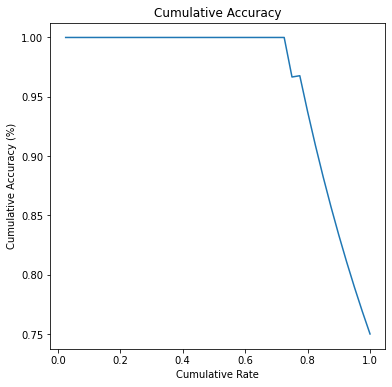

In [12]:
cumulative_acc, cumulative_rate = cumulative_accuracy(y_true, y_pred, dm)

plt.figure(figsize=(6, 6))
plt.plot(cumulative_rate, cumulative_acc)
plt.xlabel("Cumulative Rate")
plt.ylabel("Cumulative Accuracy (%)")
plt.title("Cumulative Accuracy")
plt.show()

In [13]:
from sklearn.metrics import balanced_accuracy_score

bal_acc = balanced_accuracy_score(y_true, y_pred)
bal_acc

0.75

In [14]:
from sklearn import metrics as met

In [15]:
y_err_c1 = y_true[idx_true_c1] != y_pred[idx_true_c1]
y_err_c1

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True])

In [16]:
dm[idx_true_c1]

array([0.075, 0.144, 0.219, 0.317, 0.365, 0.369, 0.397, 0.436, 0.442,
       0.568, 0.615, 0.651, 0.704, 0.705, 0.789, 0.802, 0.869, 0.909,
       0.925, 0.933])

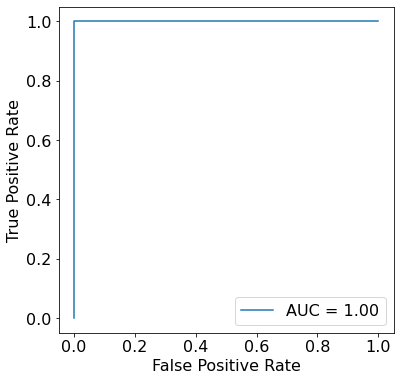

In [17]:
fpr, tpr, _ = met.roc_curve(y_err_c1, dm[idx_true_c1], pos_label=1)
roc_auc = met.auc(fpr, tpr)

plt.rcParams["font.size"] = 16
fig, ax = plt.subplots(figsize=(6, 6))
roc_display = met.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display.plot(ax=ax)
plt.show()

In [18]:
y_err = y_true != y_pred
y_err

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True])

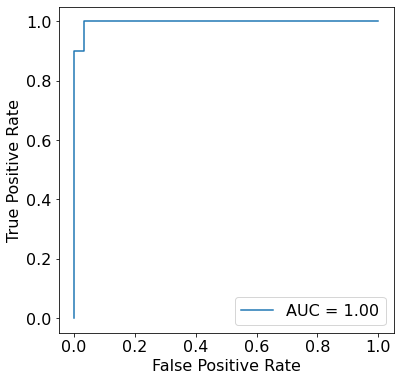

In [19]:
fpr, tpr, _ = met.roc_curve(y_err, dm, pos_label=1)
roc_auc = met.auc(fpr, tpr)

plt.rcParams["font.size"] = 16
fig, ax = plt.subplots(figsize=(6, 6))
roc_display = met.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display.plot(ax=ax)
plt.show()

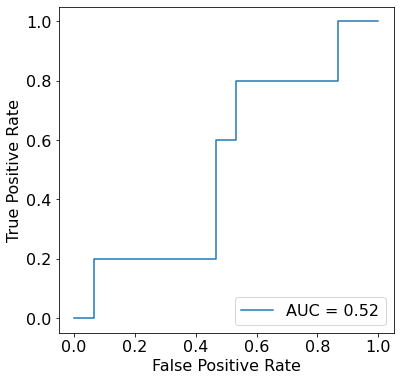

In [20]:
np.random.seed(1234)
dm_rand = np.random.randn(len(y_err_c1))

fpr, tpr, _ = met.roc_curve(y_err_c1, dm_rand, pos_label=1)
roc_auc = met.auc(fpr, tpr)

plt.rcParams["font.size"] = 16
fig, ax = plt.subplots(figsize=(6, 6))
roc_display = met.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display.plot(ax=ax)
plt.show()

In [21]:
def permROC(y_true, y_pred, dmeaure, n_perm):
    perm_auc = np.zeros(n_perm)

    y_pred = np.round(y_pred).astype(int)
    idx_pred0 = np.where(y_pred == 0)[0]
    idx_pred1 = np.where(y_pred == 1)[0]

    n_true0 = np.sum(y_true == 0)
    n_true1 = np.sum(y_true == 1)

    idx_true0 = np.where(y_true == 0)[0]

    prem_dmeas = np.zeros(len(dmeaure))

    for i in range(n_perm):
        perm_idx0 = np.random.permutation(idx_pred0)
        perm_idx1 = np.random.permutation(idx_pred1)

        prem_dmeas[idx_pred0] = dmeaure[perm_idx0]
        prem_dmeas[idx_pred1] = dmeaure[perm_idx1]

        ranks = rankdata(prem_dmeas)

        s1 = np.sum(ranks[idx_true0])

        auc = (s1 - (n_true0 * (n_true0 + 1) / 2)) / (n_true0 * n_true1)
        perm_auc[i] = auc
    significance_val = np.percentile(perm_auc, 95)

    return significance_val, perm_auc

In [22]:
sig_val, perm_auc = permROC(y_true, y_pred, dm, 10000)
print(sig_val)

0.6225


In [23]:
dm_rand = np.random.randn(n_sample)
sig_val, perm_auc = permROC(y_true, y_pred, dm_rand, 10000)
print(sig_val)

0.645


In [24]:
idx_sortByDm = np.argsort(dm)

In [25]:
# 0 percentile is meaningless
points = np.linspace(0, 1, 100 + 1)[1:]
print(len(points))
points

100


array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [26]:
from sklearn.preprocessing import QuantileTransformer

/home/lukec/.local/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2591: UserWarning: n_quantiles (100) is greater than the total number of samples (40). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


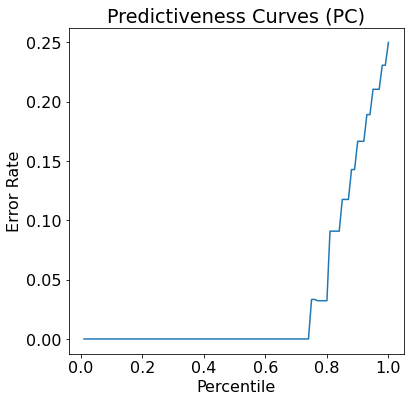

In [27]:
transformer = QuantileTransformer(n_quantiles=100)
dm_quantile = transformer.fit_transform(dm.reshape(-1, 1))
dm_quantile = dm_quantile.reshape(-1)

pred_err = (y_pred != y_true).astype(int)
err_rates = np.zeros_like(points)
for i, p in enumerate(points):
    idx = np.where(dm_quantile <= p)
    err = np.mean(pred_err[idx]) if len(idx) > 0 else 0
    err_rates[i] = err

plt.rcParams["font.size"] = 16
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(points, err_rates)
ax.set_xlabel("Percentile")
ax.set_ylabel("Error Rate")
ax.set_title("Predictiveness Curves (PC)")
plt.show()

/home/lukec/.local/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2591: UserWarning: n_quantiles (100) is greater than the total number of samples (40). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


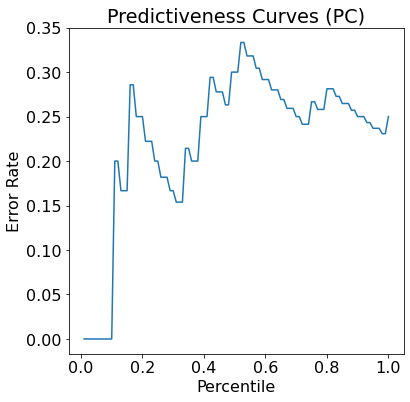

In [28]:
transformer = QuantileTransformer(n_quantiles=100)
dm_rand_quantile = transformer.fit_transform(dm_rand.reshape(-1, 1))
dm_rand_quantile = dm_rand_quantile.reshape(-1)

pred_err = (y_pred != y_true).astype(int)
err_rates = np.zeros_like(points)
for i, p in enumerate(points):
    idx = np.where(dm_rand_quantile <= p)
    err = np.mean(pred_err[idx]) if len(idx) > 0 else 0
    err_rates[i] = err

plt.rcParams["font.size"] = 16
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(points, err_rates)
ax.set_xlabel("Percentile")
ax.set_ylabel("Error Rate")
ax.set_title("Predictiveness Curves (PC)")
plt.show()